<a href="https://colab.research.google.com/github/sushrut88/Machine-Learning-Lab/blob/main/practical_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')
Accuracy: 0.08393236807164062
Model Evaluation:
Mean Absolute Error (MAE): 42.90
Mean Squared Error (MSE

<ipython-input-6-e914e3d4847b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['total_sqft'] = X['total_sqft'].apply(convert_sqft_to_num)
<ipython-input-6-e914e3d4847b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


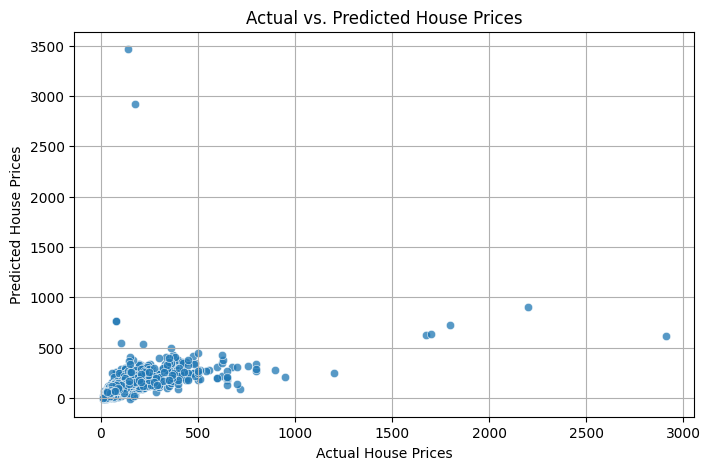

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv("/content/Bengaluru_House_Data.csv")
print(df.head())

print(df.columns)

X = df[["total_sqft", "balcony", "bath"]]
def convert_sqft_to_num(x):
    try:
        return float(x)
    except ValueError:
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        try:
            return float(x.split('Sq.')[0])
        except:
            return np.nan

X['total_sqft'] = X['total_sqft'].apply(convert_sqft_to_num)

X.dropna(inplace=True)
y = df.loc[X.index, "price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
accuracy=model.score(X_test,y_test)
print("Accuracy:",accuracy)

print(f"Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.75)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices")
plt.grid()
plt.show()

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


<ipython-input-7-acf800d3558d>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['total_sqft'] = X['total_sqft'].apply(convert_sqft_to_num)
<ipython-input-7-acf800d3558d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


Accuracy: 0.5701616764524202
Model Evaluation:
Mean Absolute Error (MAE): 35.58
Mean Squared Error (MSE): 7831.12
Root Mean Squared Error (RMSE): 88.49


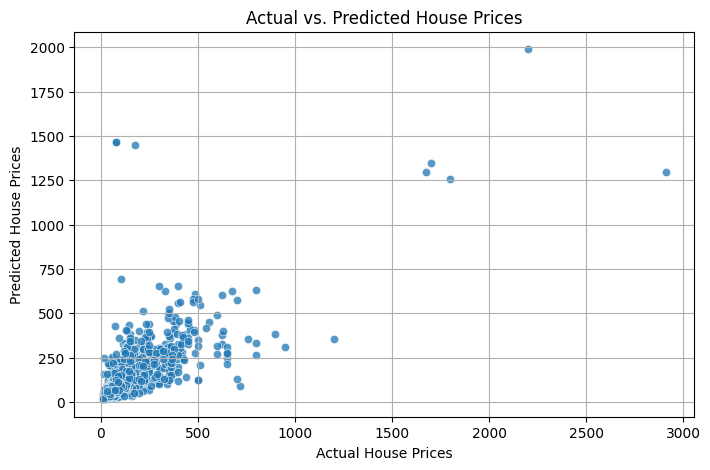

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv("/content/Bengaluru_House_Data.csv")
print(df.head())

print(df.columns)

X = df[["total_sqft", "balcony", "bath"]]
def convert_sqft_to_num(x):
    try:
        return float(x)
    except ValueError:
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        try:
            return float(x.split('Sq.')[0])
        except:
            return np.nan

X['total_sqft'] = X['total_sqft'].apply(convert_sqft_to_num)

X.dropna(inplace=True)
y = df.loc[X.index, "price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
accuracy=model.score(X_test,y_test)
print("Accuracy:",accuracy)

print(f"Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.75)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices")
plt.grid()
plt.show()

KNN Regression (k=3): MAE=48.8929, MSE=15149.8842, RMSE=123.0849,Accuracy=0.2884
KNN Regression (k=5): MAE=49.4313, MSE=14327.7820, RMSE=119.6987,Accuracy=0.3270
KNN Regression (k=7): MAE=50.0928, MSE=14420.4999, RMSE=120.0854,Accuracy=0.3227
Linear Regression: MAE=49.9042, MSE=13103.0495, RMSE=114.4686,Accuracy=0.3846


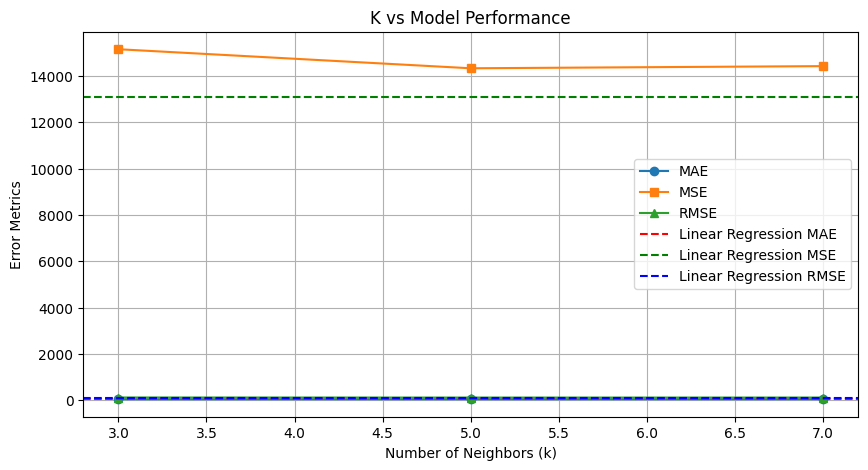

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

df = pd.read_csv("/content/Bengaluru_House_Data.csv")
X = df.drop(columns=["price"])
y = df["price"]

categorical_cols = ['area_type', 'availability', 'location']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_categorical = encoder.fit_transform(X[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

X = pd.concat([X, encoded_categorical_df], axis=1)
X = X.drop(categorical_cols, axis=1)

numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
X = X[numeric_cols]

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [3, 5, 7]
mae_scores, mse_scores, rmse_scores = [], [], []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    accuracy_knn=knn.score(X_test_scaled,y_test)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

    print(f"KNN Regression (k={k}): MAE={mae:.4f}, MSE={mse:.4f}, RMSE={rmse:.4f},Accuracy={accuracy_knn:.4f}")

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
accuracy_lr=lr.score(X_test_scaled,y_test)

print(f"Linear Regression: MAE={mae_lr:.4f}, MSE={mse_lr:.4f}, RMSE={rmse_lr:.4f},Accuracy={accuracy_lr:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(k_values, mae_scores, marker='o', linestyle='-', label="MAE")
plt.plot(k_values, mse_scores, marker='s', linestyle='-', label="MSE")
plt.plot(k_values, rmse_scores, marker='^', linestyle='-', label="RMSE")
plt.axhline(y=mae_lr, color='r', linestyle="--", label="Linear Regression MAE")
plt.axhline(y=mse_lr, color='g', linestyle="--", label="Linear Regression MSE")
plt.axhline(y=rmse_lr, color='b', linestyle="--", label="Linear Regression RMSE")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Metrics")
plt.title("K vs Model Performance")
plt.legend()
plt.grid()
plt.show()